# Computer Vision - P2

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P2_Student1_Student2.zip** that includes:
    - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 16th, 23:00 h** 

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing and convolution (exercises 2.1, 2.2, 2.3 and 2.4)
2. Edge detection (exercises 2.5, 2.6 and 2.7)

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

### 2.1 RGB histogram visualization

In [1]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks
import matplotlib.image as mpimg
from skimage.color import rgb2gray
from skimage.color import rgba2rgb

a) Read the image "face.png" and visualize the RGB image as well as each of its channels separately (R, G, and B).

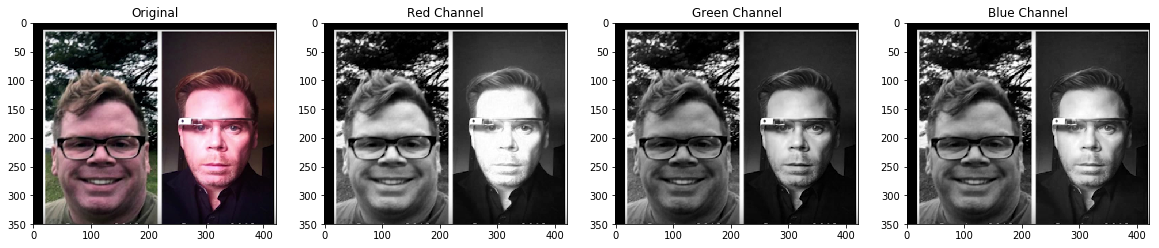

In [2]:
face_img = io.imread('images/face.png')#Image reading

f,rgb_faces = plt.subplots(ncols = 4,nrows = 1,figsize=(20,10))#Creating a frame

#Assigning the three image channels to its variables
red_channel, green_channel, blue_channel = face_img[:,:,0], face_img[:,:,1], face_img[:,:,2] 

#Showing the three channels and the rgb on a frame
rgb_faces[0].imshow(face_img, cmap='gray')
rgb_faces[0].set_title('Original')
rgb_faces[1].imshow(red_channel, cmap = "gray")
rgb_faces[1].set_title("Red Channel")
rgb_faces[2].imshow(green_channel, cmap = "gray")
rgb_faces[2].set_title("Green Channel")
rgb_faces[3].imshow(blue_channel, cmap = "gray")
rgb_faces[3].set_title("Blue Channel")

plt.show()

b) Visualize the histogram of the image. What is the histogram representing for an image? 
The plotted histogram must accomplish these requirements (see image bellow as an example of histogram extraction):

    - Obtain the histogram with 8 and 32 bins. 

    - Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences.

Note: What type should be the image in order to compute the histogram? check using different bins for the histogram. 

Hint : the `exposure` module within the `skimage` library makes the histogram extraction easy!

Help: [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_for_notebook/ex21a.png'>

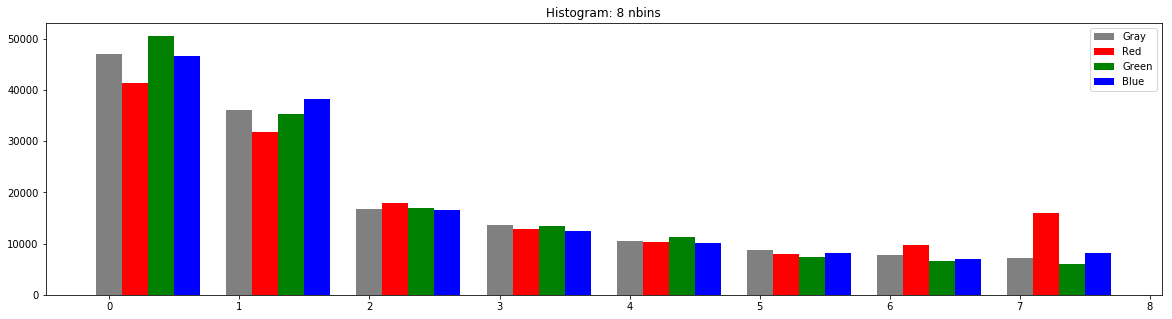

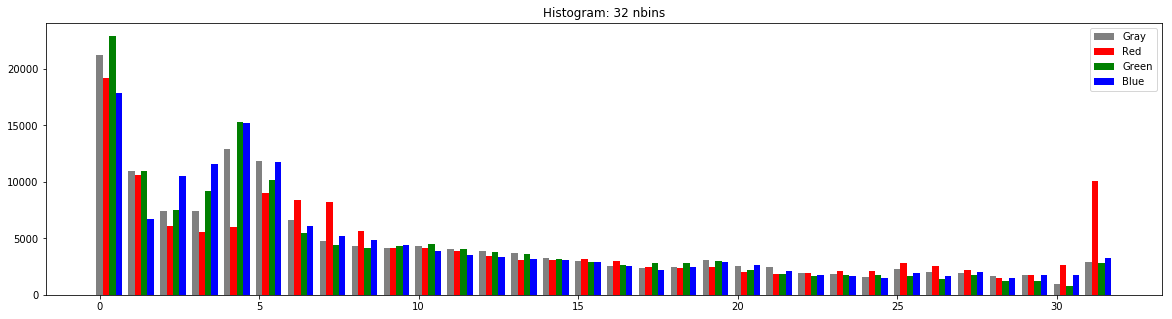

In [3]:
from skimage import exposure
from skimage import img_as_float

def imageToHistogram(input_image, n, h_title):
    image = img_as_float(input_image) #Parsing input image to float
    
    #Assigning to histogram and bins variable its corresponding value with the funcion exposure.histogram()
    gray_histogram, gray_bins = exposure.histogram(rgb2gray(image), nbins = n)
    red_histogram, red_bins = exposure.histogram(image[...,0], nbins = n)
    green_histogram, green_bins = exposure.histogram(image[...,1], nbins = n)
    blue_histogram, blue_bins = exposure.histogram(image[...,2], nbins = n)
    
    #Frame creation
    f,histo = plt.subplots(figsize=(20,5))
    
    indx = np.arange(n)
    wdth = 0.20 #Needed width to represent each value
    
    #Creating each representation bar setting its place with the "indx + n * width" formula.
    #The bar function also allow us to set bar's width and .
    gray_bar = histo.bar(indx, gray_histogram, wdth, color='gray')
    red_bar = histo.bar(indx+wdth, red_histogram, wdth, color='r')
    green_bar = histo.bar(indx+2*wdth, green_histogram, wdth, color='g')
    blue_bar = histo.bar(indx+3*wdth, blue_histogram, wdth, color='b')
    
    #Setting title and legend to the histogram
    histo.set_title(h_title + ": " + str(n) + " nbins")
    histo.legend(["Gray", "Red", "Green", "Blue"])
    plt.show()

nbins = np.array([8, 32])
for i in nbins:
    imageToHistogram(face_img, i, "Histogram")

#### QUESTION: What type should be the image in order to compute the histogram? check using different bins for the histogram.

#### AWNSER: 
In order to compute the histogram correctly, we need to convert the image to float

#### QUESTION: What is the histogram representing for an image? 


#### AWNSER: 
The histogram shows the graphical representation of the rgb distribution of an image.

### 2.2 Grayscale and RGB images filtering (convolutions)

a) Read the image `face.png` and apply each of the following steps:

1. Convert it to grayscale with the function `color.rgb2gray()` of the package `skimage`.
2. Convolve it with a horizontal mask `mask_h1d=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]` using the function `ndimage.convolve()` of the package `scipy`.
3. Convolve the original image (1) with a transposed version of the mask in (2).
4. Convolve the original image (1) with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

**Visualize the output of each step (1 to 4) next to each other. Write short titles on each figure to make them understandable.**

#### Questions

- Observe and comment how the ***type*** and the ***range of values (max & min)*** changed when different operations have been applied on the image. 

- Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.

Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without values range rescaling.

Note: The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

Note: Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).

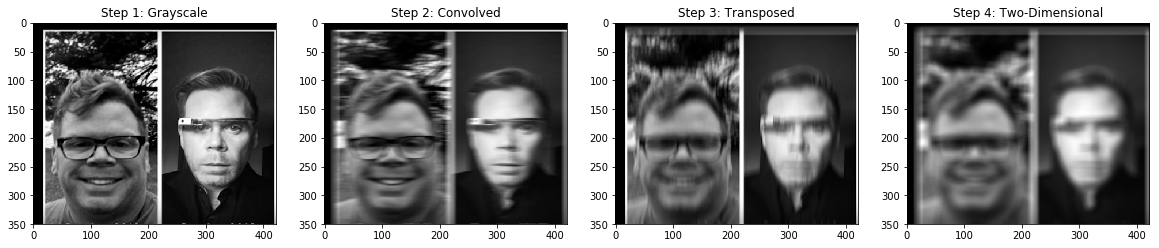

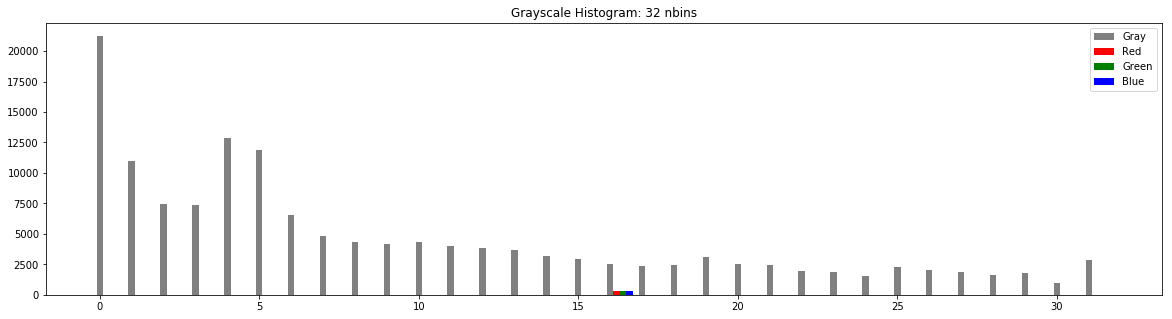

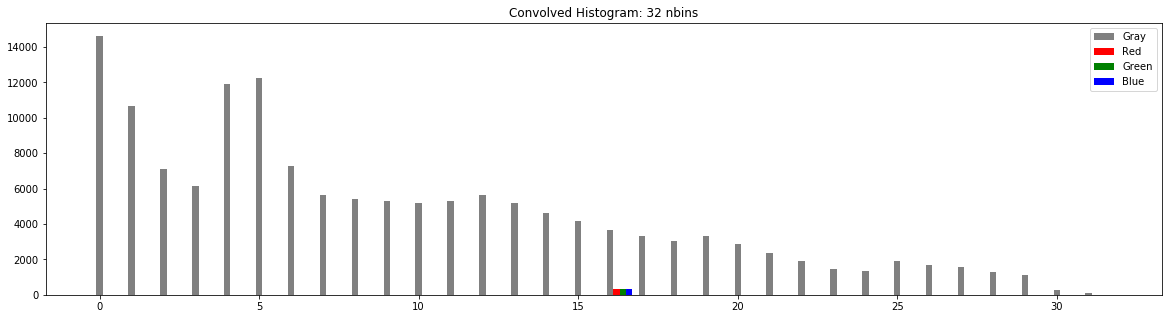

In [4]:
from scipy import ndimage

#grayscale

gray_face = rgb2gray(face_img) #Face image turned to grayscale

#convolved

mask = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]],dtype='float') #creating the variable that will contain the mask
mask_h1d = mask / np.sum(mask) #Mask normalization

convolved_face = img_as_float(gray_face)
convolved_face = ndimage.convolve(convolved_face,mask_h1d) #Applying the mask to convolve the image (first passed to grayscale)

#original transposed

transposed_mask = np.transpose(mask_h1d) #Transposing the normalized mask

transposed_convolved = img_as_float(gray_face)
transposed_convolved = ndimage.convolve(transposed_convolved,transposed_mask) #Convolvimng the image with the trasposed mask

#two-dimesional

mask_2D = np.outer(mask_h1d,mask_h1d) #Creating the teo dimentional mask using the original 1D mask
mask_2D = mask_2D /np.sum(np.sum(mask_2D))

original_2D = img_as_float(gray_face)
original_2D = ndimage.convolve(original_2D,mask_2D)#Applying the 2D mask to the original image

f, faces = plt.subplots(ncols = 4,nrows = 1,figsize=(20,10))#Frame creation

#Showing all four images with their titles
faces[0].imshow(gray_face, cmap='gray')
faces[0].set_title('Step 1: Grayscale')
faces[1].imshow(convolved_face, cmap = "gray")
faces[1].set_title("Step 2: Convolved")
faces[2].imshow(transposed_convolved, cmap ='gray')
faces[2].set_title("Step 3: Transposed")
faces[3].imshow(original_2D, cmap = "gray")
faces[3].set_title("Step 4: Two-Dimensional")

plt.show()

imageToHistogram(gray_face, 32, "Grayscale Histogram")
imageToHistogram(convolved_face,32, "Convolved Histogram")


## QUESTIONS

### Observe and comment how the type and the range of values (max & min) changed when different operations have been applied on the image.

We can observe that the type didn't change, because We are using images in grayscale in order to convolve them, the type of the images is untouched. On the other hand, the max values and min values differ depending to the convolve process, being a little bit higher in some points in the convolved one, which We are using as a reference.

### Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.

Is important the type of the mask because it has to be a permanent float type because the numbers of the image goes from 0 to 1, if the mask is made of integers, then it'll surpass the values of the image. 

b) Given a color image (im), what is the difference between ***1*** and ***2*** ?
   
*** 1. ***

im_2=np.array(im, dtype='float')


*** 2. ***

im_2=np.array(im)


im_2=img_as_float(im_2)

np.array(im, dtype='float'): 
 [[   0.    0.    0.  255.]
 [   0.    0.    0.  255.]
 [   0.    0.    0.  255.]
 ..., 
 [   0.    0.    0.  255.]
 [   0.    0.    0.  255.]
 [   0.    0.    0.  255.]]

 img_as_float(np.array(im)): 
 [[ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 ..., 
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]]


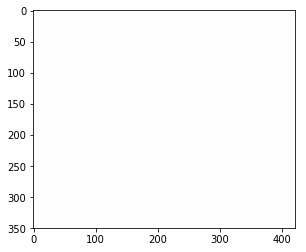

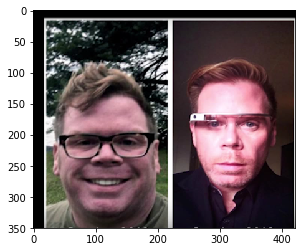

In [5]:
img_2 = np.array(face_img, dtype='float')

img_3 = np.array(face_img)
img_3 = img_as_float(img_3)

print("np.array(im, dtype='float'): \n",img_2[1]) #Printing only one row is enough
print("\n img_as_float(np.array(im)): \n",img_3[1])

plt.imshow(img_2, cmap='gray')
plt.show()

plt.imshow(img_3, cmap='gray')
plt.show()

#### Answer:
The difference between the two type (1 and 2) is that the first one, it creates an array/matrix but from 0 to 255. The number 2, otherwise, also creates the array/matrix but, by using the img_as_float, the matrix is normalize and the values for every pixel are from 0 to 1. 

In the case of the number 1, it creates an array of floats values (0 to 1) but in range of 0 to 255, because of that, the resultant image is just a white image.

c) Can we convolve a color (RGB) image? In order to convolve an RGB each of the channels must be convolved separately.

Implement a function that applies a 3-channel filter and visualize its result on `face.png` with a 15x15 uniform mask.

Which is the result obtained when applying a single-channel filter channel by channel separately?

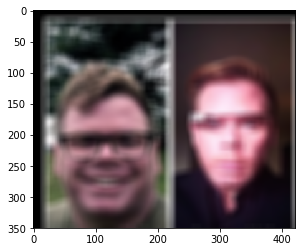

In [6]:
#This method applies a 2D 15 by 15 mask to an image passed by parameter
#We initialy wanted to make the method to be able to create a 2D x by x mask but the exercice specifies that it has to be 15 by 15
def rgb_convolved15by15(input_image):
    rgb_convolved = input_image.copy()
    red_channel, green_channel, blue_channel = input_image[:,:,0], input_image[:,:,1], input_image[:,:,2]#Assigning the three image channels to its variables

    #This creates the 15x15 mask
    mask_2D = np.ones((15,15))
    mask_2D = mask_2D /np.sum(mask_2D)
    
    #Once we have created the mask we need to convolve all image's channels separately...
    red_convolved = img_as_float(red_channel) 
    red_convolved = ndimage.convolve(red_convolved,mask_2D)

    green_convolved = img_as_float(green_channel)
    green_convolved = ndimage.convolve(green_convolved,mask_2D)

    blue_convolved = img_as_float(blue_channel)
    blue_convolved = ndimage.convolve(blue_convolved,mask_2D)
    
    #... and assign them to a new image's channels (reconverted to usual scale)
    rgb_convolved[:,:,0] = red_convolved*255
    rgb_convolved[:,:,1] = green_convolved*255
    rgb_convolved[:,:,2] = blue_convolved*255
    
    return rgb_convolved

plt.imshow(rgb_convolved15by15(face_img), cmap='gray')
plt.show()

### Which is the result obtained when applying a single-channel filter channel by channel separately? 

#### Answer: 
We will have each channel with the filter applied and if we overlap the three channels we'll have the RGB filtered image

### 2.3 Effect of image scale on convolutions

a) Resize an image and observe the variations in the histograms.

1. Reduce it 10 times
2. Augment it 10 times. 
3. Observe if the histogram (i.e. nbins = 32) of the new images changed, and comment what happens and why.

Note: Use the command `resize` to change the size of the images.


original shape:  (350, 422, 4)
reduced face, 10 times smaller  :  (35, 42, 4)
augmented face, 10 times bigger  :  (3500, 4220, 4)


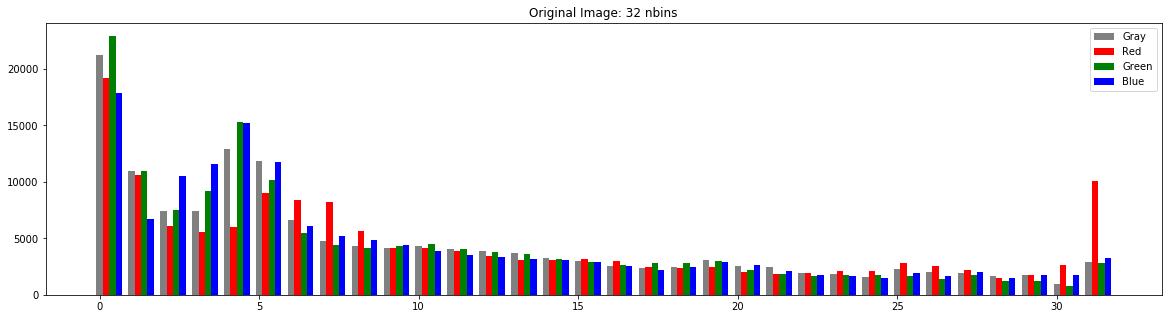

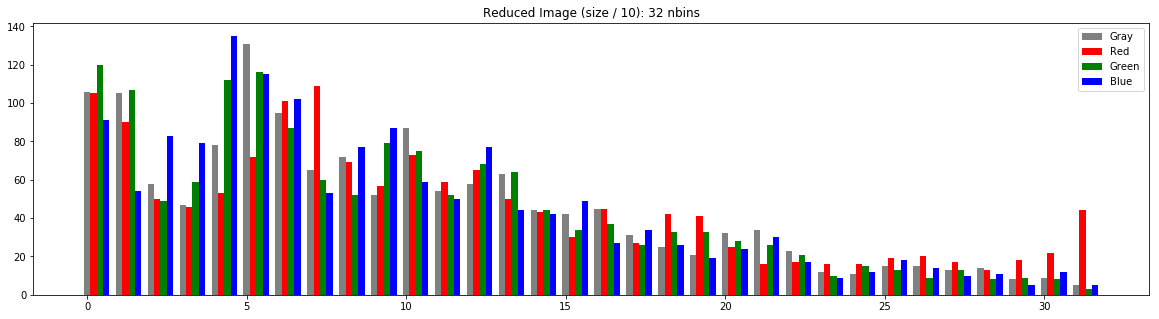

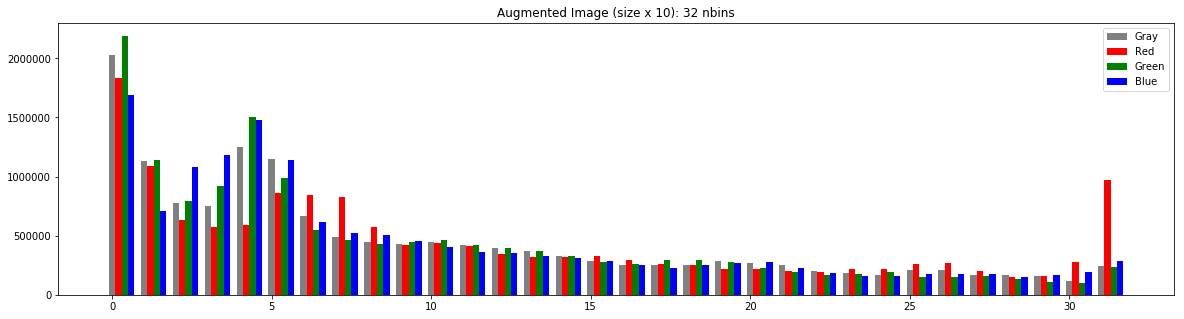

In [9]:
from scipy.misc import imresize

#Using resize method to reduce and augment by 10 image's size
reduced_face = imresize(face_img, 1./10)
augmented_face = imresize(face_img, 10.)

#Also, there's the transform.resize from skimage package:
# transform.resize(face_img,(int(face_img.shape[0]/math.sqrt(10))), int(face_img.shape[1]/math.sqrt(10))) For the reducing.
# transform.resize(face_img,(int(face_img.shape[0]*math.sqrt(10))), int(face_img.shape[1]*math.sqrt(10))) For the augmenting.
#But We decided to use the imresize from the scipy.misc package since its a little more easier to use.

#Shape function allow us to see the size changing on the first two picture's channels
print("original shape: ", face_img.shape)
print("reduced face, 10 times smaller  : ",  reduced_face.shape)
print("augmented face, 10 times bigger  : ", augmented_face.shape)

#Showing the three histograms for original, reduced, and augmented pictures
imageToHistogram(face_img, 32, 'Original Image')
imageToHistogram(reduced_face, 32, 'Reduced Image (size / 10)')
imageToHistogram(augmented_face, 32, 'Augmented Image (size x 10)')

We can see that, first of all, the histograms ploted show that there were some changes made on the image. In the reduced image We can see that the values for every column (bin) are lesser in every way if We compare it with the original. On the other way, in the augmented one, the values of its histogram are far greater than in the original.

b) Apply a convolution (15x15 uniform mask) on the resized images and compare the results.

1. Convolve the original image.
2. Convolve the image reduced 10 times.
3. Convolve the image augmented 10 times.

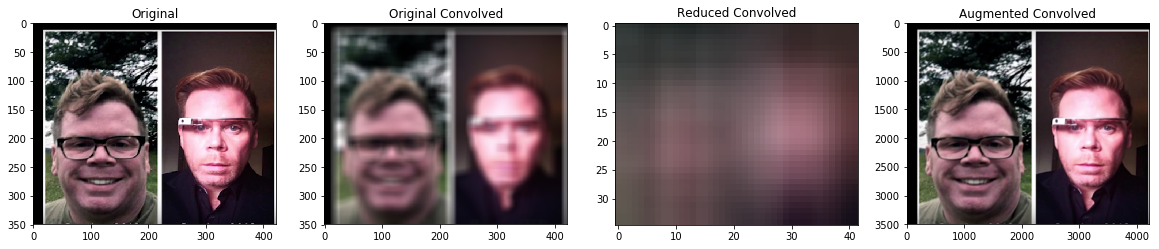

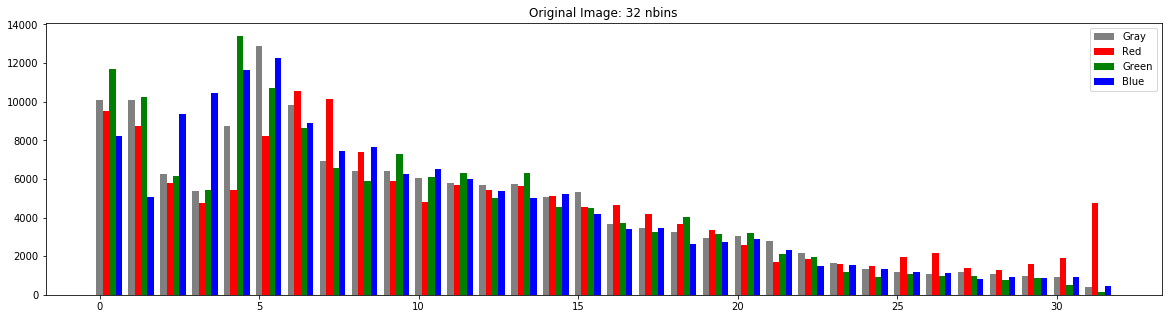

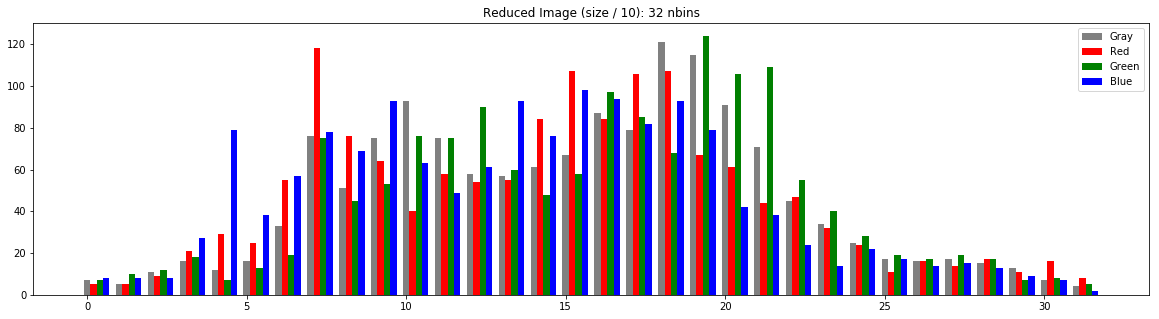

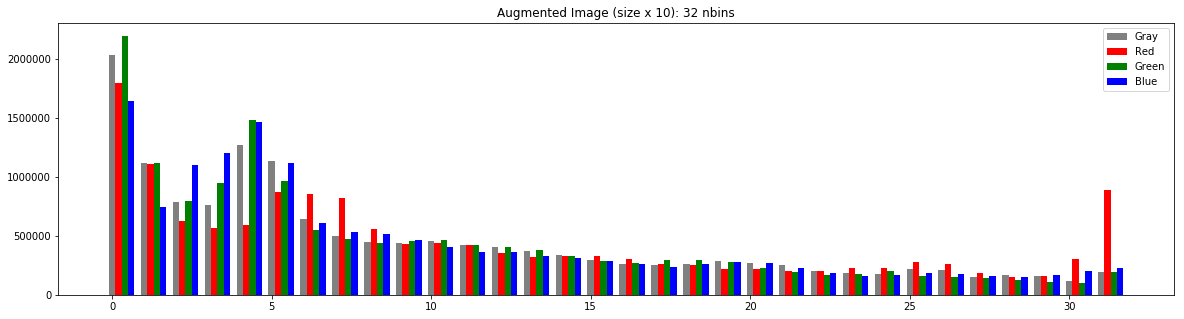

In [10]:
#We need to convolve the images with "convolve(image, mask)" function
convolved_original =  rgb_convolved15by15(face_img)
convolved_reduced_face = rgb_convolved15by15(reduced_face)
convolved_augmented_face = rgb_convolved15by15(augmented_face)

#Frame creation
f, faces = plt.subplots(ncols = 4,nrows = 1,figsize=(20,10))

#Showing all four images with their titles
faces[0].imshow(face_img, cmap='gray')
faces[0].set_title("Original")
faces[1].imshow(convolved_original, cmap = "gray")
faces[1].set_title("Original Convolved")
faces[2].imshow(convolved_reduced_face, cmap ='gray')
faces[2].set_title("Reduced Convolved")
faces[3].imshow(convolved_augmented_face, cmap = "gray")
faces[3].set_title("Augmented Convolved")

plt.show()

#Showing the three convolved image's histogram
imageToHistogram(convolved_original, 32, 'Original Image')
imageToHistogram(convolved_reduced_face, 32, 'Reduced Image (size / 10)')
imageToHistogram(convolved_augmented_face, 32, 'Augmented Image (size x 10)')

By seeing the results of convolving the diferent images We can appreciate that there are some changes in the resized images that can be seen just by looking at them. For example, in the case of the reduced convolved, We can't see any silhouette of the original image, but, on the other hand, if We take a look to the augmented one, seems as it haven't overcome any change. 
For the histograms of each, We can see that the values changed a lot in the reduced one but for the augmented, the only thing that changed were the values of the bins.

### 2.4 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the `face.png`:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter. parametro = disk : testear diferentes valores del parametro

Comment the effect of using different kinds of filters on the original image.

Hint: search for the skimage.filters function for creating the different filters.

C:\Users\Fran\Anaconda3\lib\site-packages\skimage\filters\_gaussian.py:108: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


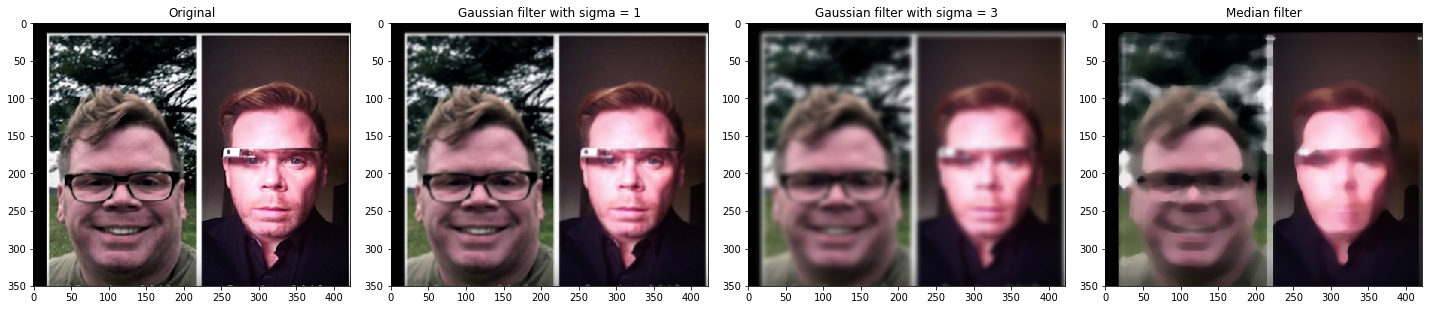

In [11]:
from skimage import filters

#This is needed because if not, when we apply the gaussian filters and show the result it will appear a bluish coat 
#in the result. Changing the image to rgb makes this bluish effect disappear.
face_rgb = rgba2rgb(face_img)

#Using the function gaussian of filters we obtain the gauss filter with its corresponding sigma value
gaussian_sigma1 = filters.gaussian(face_rgb, 1)
gaussian_sigma3 = filters.gaussian(face_rgb, 3)

#since the median filter needs a footprint where we apply a mask, we creat that said mask, in this case two-dimensional
#and normalize it.
mask_2d = np.ones(([15,15,1]), dtype='float')
mask_2d = mask_2d/np.sum(np.sum(mask_2d))

medianFilter = ndimage.median_filter(face_rgb, footprint = mask_2d)

f, faces= plt.subplots(ncols=4,nrows=1,figsize=(20,10))

faces[0].imshow(face_img, cmap='gray')
faces[0].set_title('Original')

faces[1].imshow(gaussian_sigma1, cmap='gray')
faces[1].set_title('Gaussian filter with sigma = 1')

faces[2].imshow(gaussian_sigma3, cmap='gray')
faces[2].set_title('Gaussian filter with sigma = 3')

faces[3].imshow(medianFilter, cmap ='gray')
faces[3].set_title('Median filter')

plt.tight_layout()
plt.show()

We can see that, depending of the sigma value used in the gaussian filter, the image is going to be more clear or more blurry, higher the sigma blurrier the image. For the median filter, its result can be seen as a more blurrier image, We apply for the median filter the 2D mask we created to see the changes.

b) **(Optional)** Apply the smoothing on some other images and present their results.

### 2.5 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Roberts.
2. Prewitt
3. Sobel
4. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Which is the best countour detection technique? 

- Which are the optimal parameters for this image? 

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

**Hint**: use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

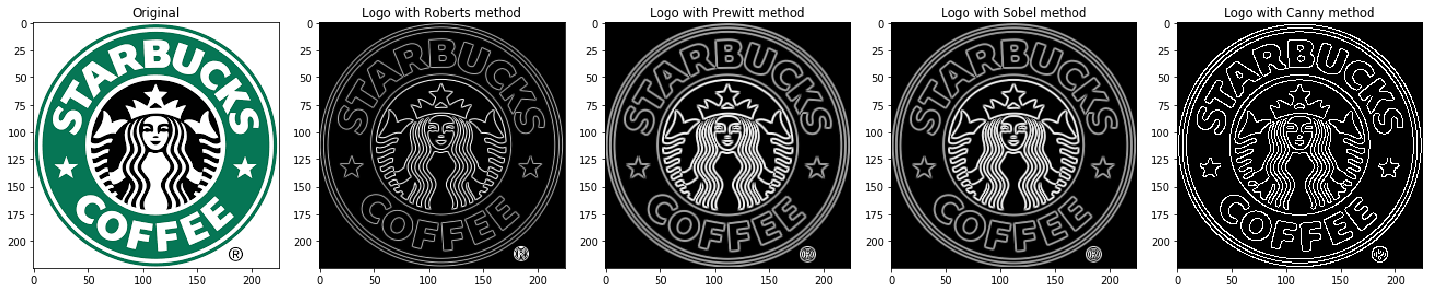

In [12]:
from skimage.feature import canny

logo_img = io.imread('images/logo.png')

#After loading the logo image we need to turn it into a two channel image in order to use the asked filters.
logo_gray = rgb2gray(logo_img)

#Applying the different contour extraction tecniques to logo image and assigning them to variables
roberts_logo = filters.roberts(logo_gray)
prewitt_logo = filters.prewitt(logo_gray)
sobel_logo = filters.sobel(logo_gray)
canny_logo = canny(logo_gray,sigma=1)

#Creating a frame
f, logos= plt.subplots(ncols=5,nrows=1,figsize=(20,10))

#Showing all images on the frame
logos[0].imshow(logo_img, cmap='gray')
logos[0].set_title('Original')

logos[1].imshow(roberts_logo, cmap='gray')
logos[1].set_title('Logo with Roberts method')

logos[2].imshow(prewitt_logo, cmap='gray')
logos[2].set_title('Logo with Prewitt method')

logos[3].imshow(sobel_logo, cmap='gray')
logos[3].set_title('Logo with Sobel method')

logos[4].imshow(canny_logo, cmap ='gray')
logos[4].set_title('Logo with Canny method')

plt.tight_layout()
plt.show()

#### **Answers:**

##### - Which is the best countour detection technique?

  After applying all the asked filters in order to obtain the countours of the logo image, We concluded that the Prewitt       and the Sobel methods are the best because they select the countours of the image with a extra width, giving some roundy
  smooth effect to the borders.

##### - Which are the optimal parameters for this image? 

  Since we used only the standard parameters for the functions used in order to get the countours, except the Canny method, 
  We can say that the one type of optimal parameters are the default ones. For the Canny, We used 1 as the value for the 
  Sigma parameter.


##### - Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

  Just like we said in the previous question, one of the parameters that We can use in the functions used is a mask that's 
  going to be applied to the picture. Since We use the default one, We can asume that the default mask was previously
  normalized



b)	Repeat the experiment with other images, you can use the ones included in the folder **images**. Comment if some parameter needs to be changed for the different images.

#### **Questions**

- Are the contours improved if the image is previously smoothed ? 
- Which are the limitations of the different images contour extraction?

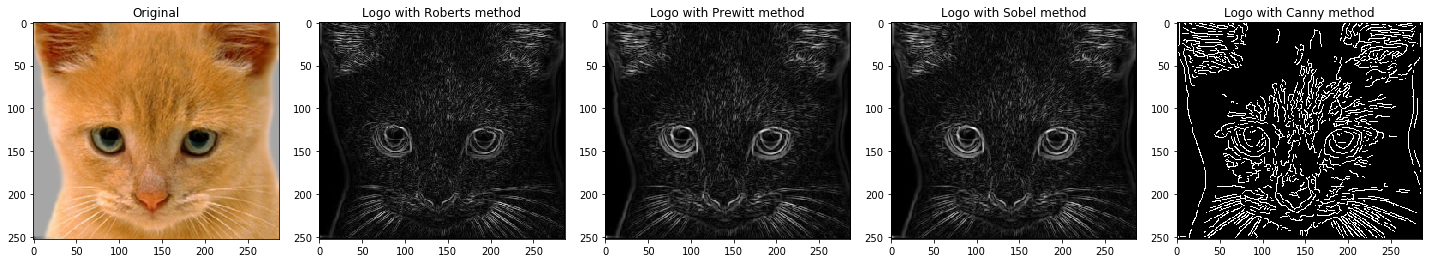

In [17]:
cat_pic = io.imread('images/cat.jpg')
cat_gray = rgb2gray(cat_pic)

#Applying the different filters
roberts_logo = filters.roberts(cat_gray)
prewitt_logo = filters.prewitt(cat_gray)
sobel_logo = filters.sobel(cat_gray)
canny_logo = canny(cat_gray,sigma=1)

#Creating a frame
f, logos= plt.subplots(ncols=5,nrows=1,figsize=(20,10))

#Showing all images on the frame
logos[0].imshow(cat_pic, cmap='gray')
logos[0].set_title('Original')

logos[1].imshow(roberts_logo, cmap='gray')
logos[1].set_title('Logo with Roberts method')

logos[2].imshow(prewitt_logo, cmap='gray')
logos[2].set_title('Logo with Prewitt method')

logos[3].imshow(sobel_logo, cmap='gray')
logos[3].set_title('Logo with Sobel method')

logos[4].imshow(canny_logo, cmap ='gray')
logos[4].set_title('Logo with Canny method')

plt.tight_layout()
plt.show()

#### **Answers: **

##### - Are the contours improved if the image is previously smoothed ? 
   If the image is previously smoothed the contours are better. By smoothing the image, this process does a median filter
   and by this, the contours can be seen improved.

##### - Which are the limitations of the different images contour extraction?
    
   Depending of the contour extraction method used, it can be apprecieated that, for example, in the Prewitt and Sobel, the 
   contours are more defined than in the Roberts or the Canny. In the Canny, precisely, the contours are defined 
   by the value of the second derivate of the image, in other words, if the function detects a contour, 
   then its going to be collected but, if the contour is not detected, then its not plotted.
   By doing this, the Canny only gets the 'simple' contours.
   

c) Optional: How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


### 2.6 Applying smoothing in order to obtain hybrid images

a) Given `Einstein.jpg` and `monroe.jpg` images:

1. Plot both images.
2. Apply a low-pass filter to both of them and plot them.
3. Apply a high-pass filter to both of them and plot them.

By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

Hint: In order to highlight the effect, in the L(I1) image you should define a lower sigma, while for the H(I1) you should use a higher one. 

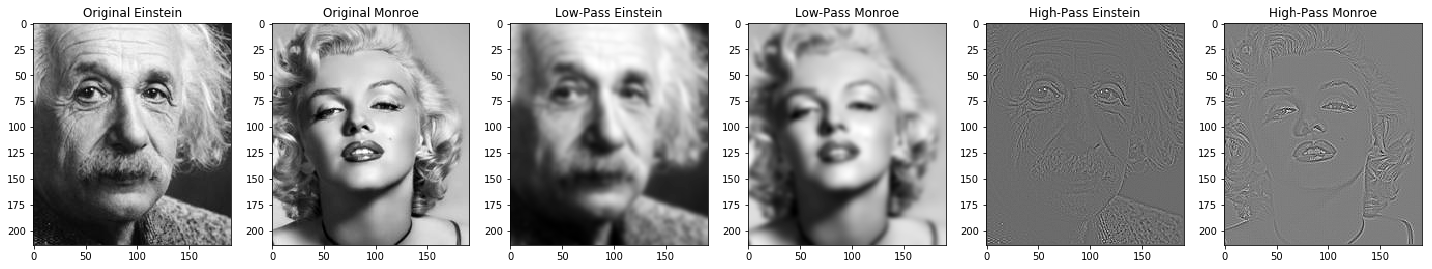

In [16]:
einstein_img = io.imread("images/Einstein.jpg")
monroe_img = io.imread("images/monroe.jpg")

#RGB to Gray for both images
einstein_gray = rgb2gray(einstein_img)
monroe_gray = rgb2gray(monroe_img)

#Getting the low-pass filter for the einstein and monroe images. 
einstein_low = filters.gaussian(einstein_gray, sigma = 2)
monroe_low = filters.gaussian(monroe_gray, sigma = 2)

einstein_high = filters.laplace(einstein_img)
monroe_high = filters.laplace(monroe_img)

f, low_high_pics= plt.subplots(ncols=6,nrows=1,figsize=(20,10))

low_high_pics[0].imshow(einstein_img, cmap='gray')
low_high_pics[0].set_title('Original Einstein')

low_high_pics[1].imshow(monroe_img, cmap='gray')
low_high_pics[1].set_title('Original Monroe')

low_high_pics[2].imshow(einstein_low, cmap='gray')
low_high_pics[2].set_title('Low-Pass Einstein')

low_high_pics[3].imshow(monroe_low, cmap='gray')
low_high_pics[3].set_title('Low-Pass Monroe')

low_high_pics[4].imshow(einstein_high, cmap ='gray')
low_high_pics[4].set_title('High-Pass Einstein')

low_high_pics[5].imshow(monroe_high, cmap ='gray')
low_high_pics[5].set_title('High-Pass Monroe')

plt.tight_layout()
plt.show()


b) Create hybrid images and visualize them. A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

Hybrid (I1, I2) = L(I1) + H(I2)

1. Analyze which is the best way of showing it if our aim is to see Marylin Monroe. 
2. Additionally, rescale the image to a different size and comment the results. 

Present the different visualizations of the experiment performed.

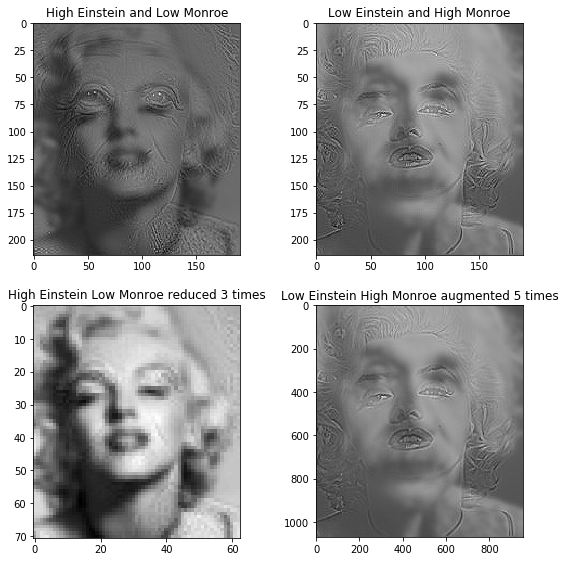

In [26]:
#Hybrid creation adding high pass filtered einstein with low pass filtered monroe and vice versa
M_low_E_high_hybrid = einstein_high + monroe_low
M_high_E_low_hybrid = monroe_high + einstein_low

#Resizing
ML_EH_r = imresize(M_low_E_high_hybrid, 1./3)
MH_EL_a = imresize(M_high_E_low_hybrid, 5.)

f, hybrids = plt.subplots(ncols=2,nrows=2,figsize=(8,8))#Frame creation

hybrids[0,0].imshow(M_low_E_high_hybrid, cmap = "gray") #Showing both hybrids on a frame
hybrids[0,0].set_title("High Einstein and Low Monroe")

hybrids[0,1].imshow(M_high_E_low_hybrid, cmap = "gray")
hybrids[0,1].set_title("Low Einstein and High Monroe")

hybrids[1,0].imshow(ML_EH_r, cmap="gray") #Showing both hybrids but resized differently
hybrids[1,0].set_title("High Einstein Low Monroe reduced 3 times")

hybrids[1,1].imshow(MH_EL_a, cmap="gray")
hybrids[1,1].set_title("Low Einstein High Monroe augmented 5 times")

plt.tight_layout()
plt.show()


c) **(Optional)**

1. Apply fspecial('gaussian,hsize,sigma') with the formula hsize=4*sigma+1. What does hsize mean?
2. Compute hybrid images from other images. Apply it over color images.

### 2.7 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg

Note: you only need to run and understand the following code, you do not need to implement anything.

Info about the animation:
Num Frames:200
Images height:180
Images width:320


/Users/eduard/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


The variable ic_small contains all rescaled images. Its shape is: (180, 320, 3, 200)


<IPython.core.display.Javascript object>


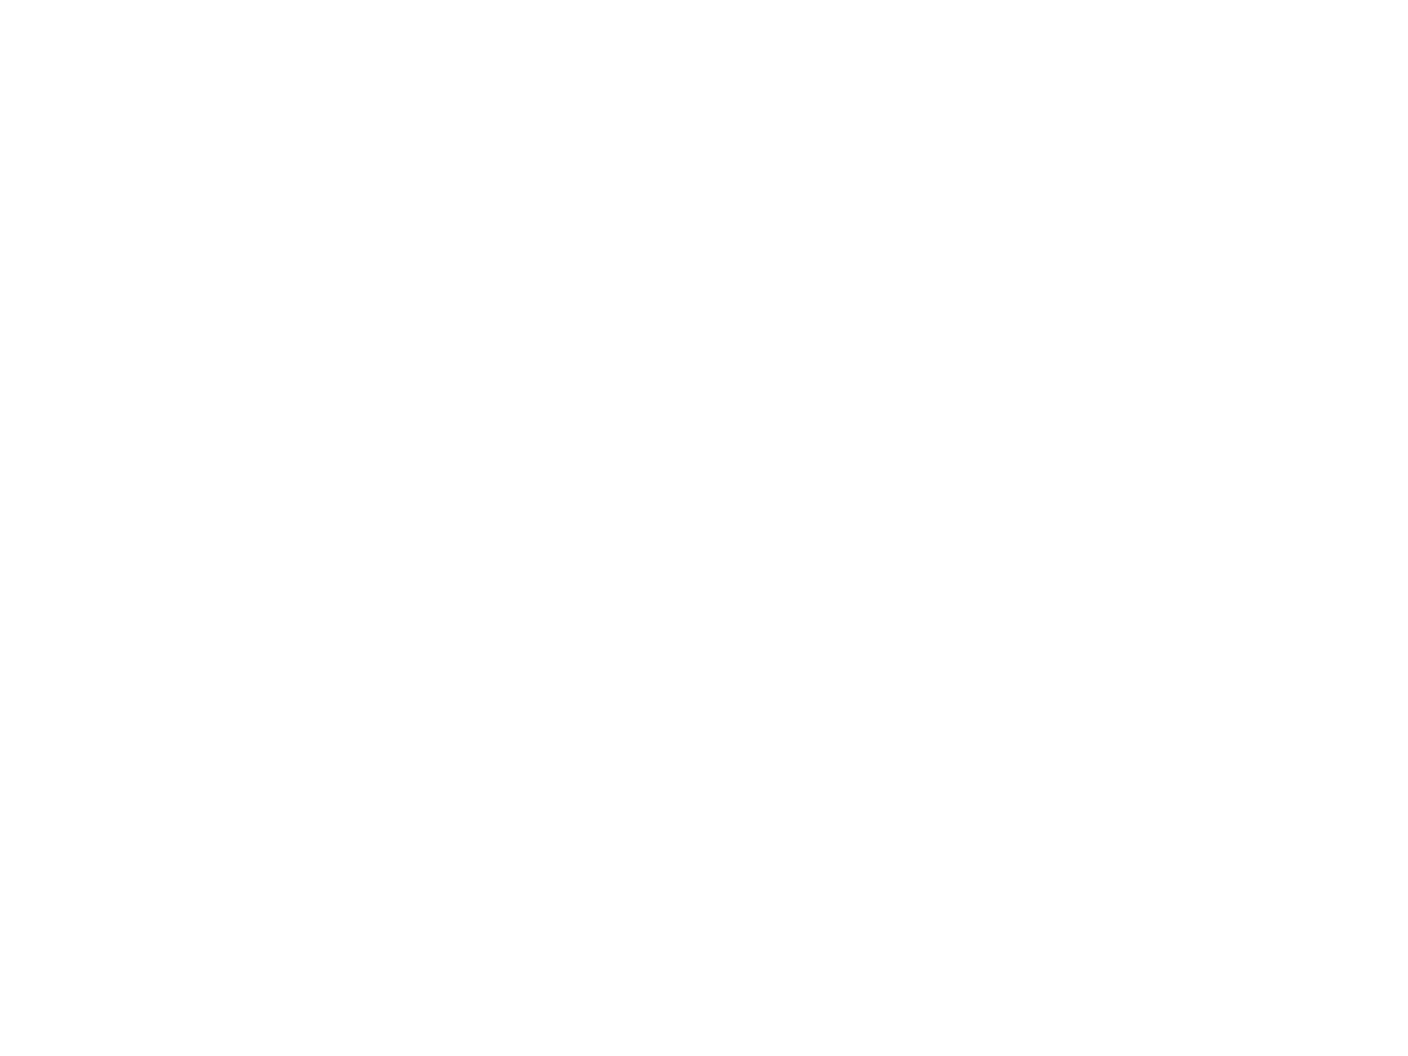

In [13]:
"""Solution, showing one video per annimation"""

from skimage import io
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('./images/bigbangcollection/*.png')

# Rescale to half of their size
scale=0.5
frames = len(ic)
height=np.int((ic[0].shape[0])*scale)
width=np.int((ic[0].shape[1])*scale)

print('Info about the animation:')
print('Num Frames:' + str(frames))
print('Images height:' + str(height))
print('Images width:' + str(width))

# create variable with dimensions of images by the number of frames
ic_small=np.ndarray(shape=(height,width,3,frames))

# combine them in ic_small variable
for i in range(frames):
        ic_small[:,:,:,i]=transform.rescale(ic[i],scale)
        
print('The variable ic_small contains all rescaled images. Its shape is: ' + str(ic_small.shape))


%matplotlib nbagg

def updatefig1(i): 
    #im.set_array(ic_small[:,:,:,i]) #showing the small image
    im.set_array(conv_color(ic_small[:,:,:,i], mask_2d))   
    plt.draw()
    return im,

fig = plt.figure()
im = plt.imshow(ic_small[:,:,:,0])
ani = animation.FuncAnimation(fig, updatefig1, interval=2, blit=True, frames=len(ic), repeat= False)
plt.show()


Info about the animation:
Num Frames:200
Images height:180
Images width:320


/Users/eduard/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


The variable ic_small contains all rescaled images. Its shape is: (180, 320, 3, 200)


Traceback (most recent call last):
  File "/Users/eduard/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/Users/eduard/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/Users/eduard/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


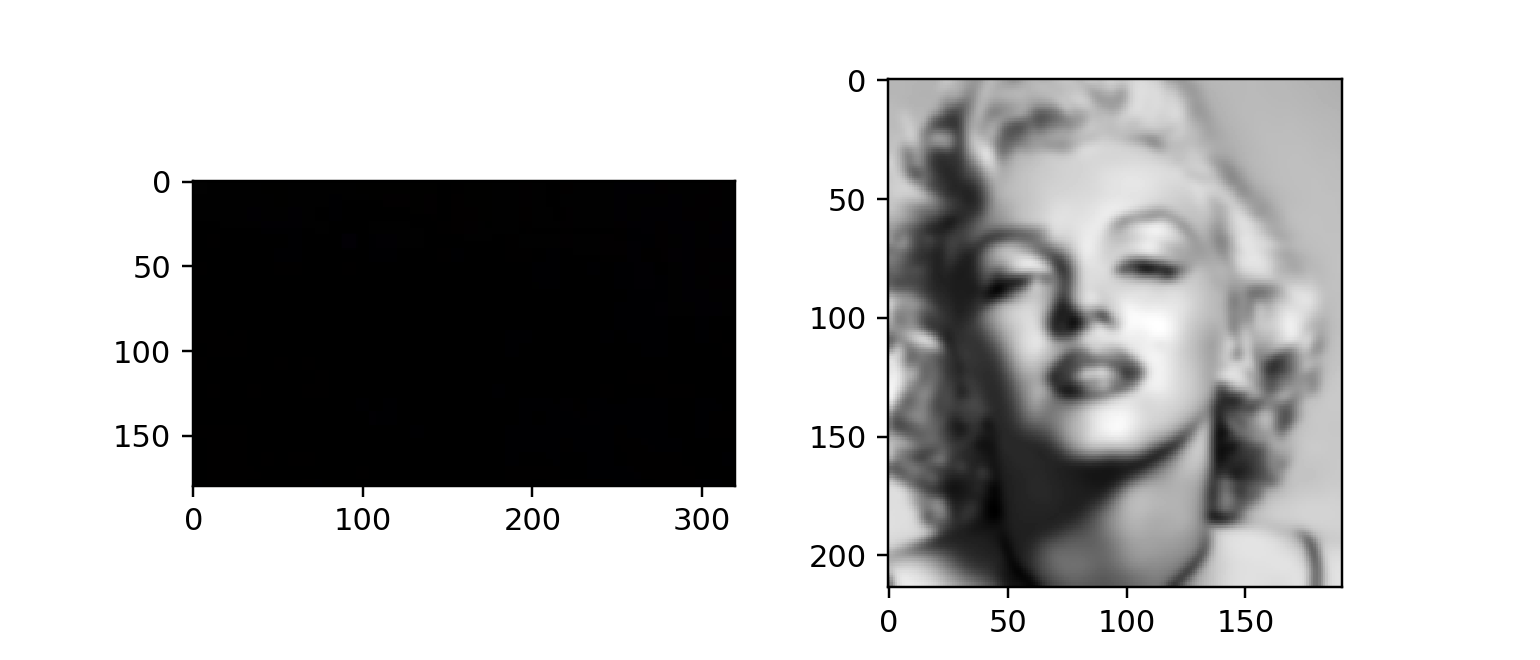

In [14]:
"""Solution, showing 2 videos per annimation : original + blurred"""

from skimage import io
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('./images/bigbangcollection/*.png')

# Rescale to half of their size
scale=0.5
frames = len(ic)
height=np.int((ic[0].shape[0])*scale)
width=np.int((ic[0].shape[1])*scale)

print('Info about the animation:')
print('Num Frames:' + str(frames))
print('Images height:' + str(height))
print('Images width:' + str(width))

# create variable with dimensions of images by the number of frames
ic_small=np.ndarray(shape=(height,width,3,frames))

# combine them in ic_small variable
for i in range(frames):
        ic_small[:,:,:,i]=transform.rescale(ic[i],scale)
        
print('The variable ic_small contains all rescaled images. Its shape is: ' + str(ic_small.shape))

# 
# the framesD matrix is created by 0s
#
%matplotlib nbagg
mask_2d=np.ones((7,7)) # 7 by 7 mask with all ones
mask_2d/=mask_2d.sum() 

def updfig2(i):
    imm1.set_array(ic_small[:,:,:,i]) # we plot the original image just with the resize
    imm2.set_array(conv_color(ic_small[:,:,:,i], mask_2d)) # we plot the convolved image with the mask_2d
    plt.draw()
    return imm1,imm2,

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(7,3))
img0=ic_small[:,:,:,0]
imm1=ax1.imshow(img0)
imm2=ax2.imshow(img0)
plt.show()
ani = animation.FuncAnimation(fig, updfig2, interval=2, 
                              blit=True, repeat=False, frames=len(ic))
plt.show()